In [6]:
import mne
from mne.io import read_raw_eeglab

from pycrostates.cluster import ModKMeans
from pycrostates.datasets import lemon


# load sample dataset
raw_fname = lemon.data_path(subject_id='010017', condition='EC')
raw = read_raw_eeglab(raw_fname, preload=True)
raw.pick('eeg')  # select EEG channels
raw.crop(0, 30)  
raw_avg = raw.copy().set_eeg_reference('average')  


C:\Users\Victor\AppData\Local\Temp\ipykernel_23276\347223470.py:10: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(raw_fname, preload=True)
C:\Users\Victor\AppData\Local\Temp\ipykernel_23276\347223470.py:10: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(raw_fname, preload=True)


Reading C:\Users\Victor\pycrostates_data\PREPROCESSED_LEMON\sub-010017_EC.fdt
Reading 0 ... 119451  =      0.000 ...   477.804 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


C:\Users\Victor\AppData\Local\Temp\ipykernel_10476\2101798469.py:12: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(raw_fname, preload=True)
C:\Users\Victor\AppData\Local\Temp\ipykernel_10476\2101798469.py:12: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(raw_fname, preload=True)
d:\Python\envs\pycrostates_tests\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


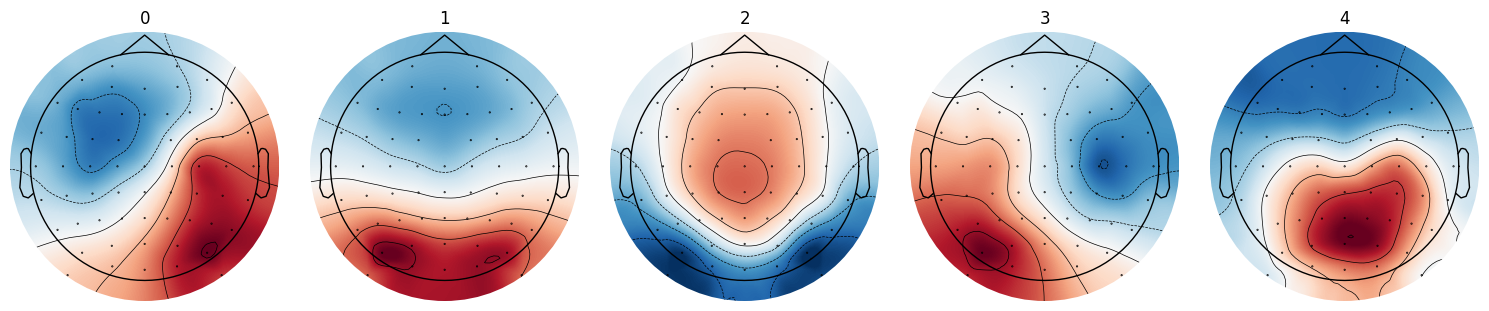

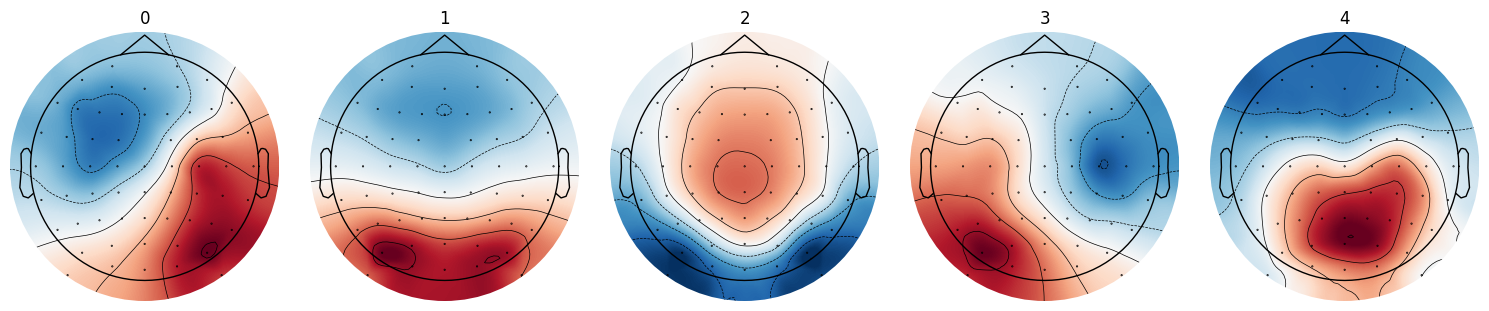

In [1]:
%load_ext autoreload
%autoreload 2

from mne.io import read_raw_eeglab

from pycrostates.cluster import ModKMeans
from pycrostates.datasets import lemon


# load sample dataset
raw_fname = lemon.data_path(subject_id='010017', condition='EC')
raw = read_raw_eeglab(raw_fname, preload=True)
raw.crop(0, 10)  # crop the dataset to speed up computation
raw.pick('eeg')  # select EEG channels
raw.set_eeg_reference('average')  # Apply a common average reference

n_clusters = 5
ModK = ModKMeans(n_clusters=n_clusters, random_state=42)

ModK.fit(raw, n_jobs=5)
ModK.plot()

In [3]:
n_clusters = 5
ModK = ModKMeans(n_clusters=n_clusters, random_state=42)
ModK._ignore_polarity = False
ModK.fit(raw_avg, n_jobs=5)

C:\Users\Victor\AppData\Local\Temp\ipykernel_20796\4160761547.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(raw_fname, preload=True)
C:\Users\Victor\AppData\Local\Temp\ipykernel_20796\4160761547.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(raw_fname, preload=True)


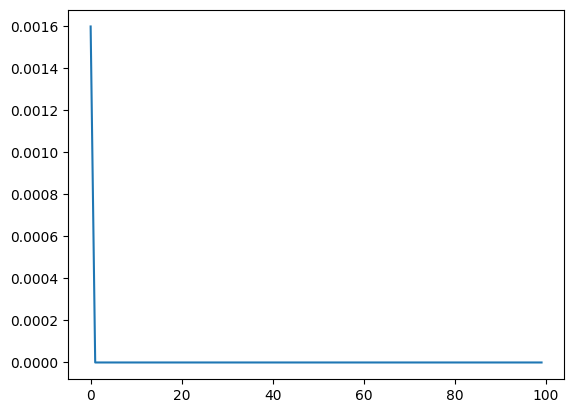

In [21]:
import numpy as np
import matplotlib.pyplot as plt

raw_fname = lemon.data_path(subject_id='010017', condition='EC')
raw = read_raw_eeglab(raw_fname, preload=True)
raw.pick('eeg')  # select EEG channels  
raw_avg = raw.copy().set_eeg_reference('average')  


n_clusters = 5
ModK = ModKMeans(n_clusters=n_clusters, random_state=42)
ModK._ignore_polarity = False
ModK.fit(raw_avg, n_jobs=5)

durations = []
smoothing_windows = np.arange(0, 100)
for smoothing_window in smoothing_windows:
    seg = ModK.predict(raw_avg, factor=10, half_window_size=smoothing_window)
    duration = np.mean([seg.compute_parameters()[f'{i}_meandurs'] for i in range(n_clusters)])
    durations.append(duration)

plt.plot(smoothing_windows, durations)

In [2]:
n_clusters = 7
ModK = ModKMeans(n_clusters=n_clusters, random_state=42)
ModK._ignore_polarity = False
ModK.fit(raw_avg, n_jobs=5)
ModK.plot();
ModK = ModKMeans(n_clusters=n_clusters, random_state=42)
ModK._ignore_polarity = True
ModK.fit(raw_avg, n_jobs=5)
ModK.plot();

d:\Python\envs\pycrostates_tests\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
ModK = ModKMeans(n_clusters=n_clusters, random_state=42)
ModK._ignore_polarity = False
ModK.fit(raw, n_jobs=5)
ModK.plot();
ModK = ModKMeans(n_clusters=n_clusters, random_state=42)
ModK._ignore_polarity = True
ModK.fit(raw, n_jobs=5)
ModK.plot();

In [78]:
%load_ext autoreload
%autoreload 2

_ignore_polarity = False

n_clusters = 5
ModK = ModKMeans(n_clusters=n_clusters, random_state=42)
ModK._ignore_polarity = _ignore_polarity
ModK.fit(raw, n_jobs=5)
ModK.plot();
ModK = ModKMeans(n_clusters=n_clusters, random_state=42)
ModK._ignore_polarity = _ignore_polarity
ModK.fit(raw_avg, n_jobs=5)
ModK.plot();


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
ModK = ModKMeans(n_clusters=n_clusters, random_state=42)

ignore_polarity = False
ModK._ignore_polarity = ignore_polarity
ModK.fit(raw, n_jobs=5)

correlation = np.array([_correlation(raw_avg.get_data(), np.array([center]*len(raw.times)).T, ignore_polarity=ignore_polarity) for center in ModK._cluster_centers_])
seg_avg = np.argmax(correlation, axis=0)

seg = ModK._labels_

np.mean(seg_avg == seg)

0.632546981207517

In [75]:
ModK = ModKMeans(n_clusters=n_clusters, random_state=42)

ignore_polarity = False
ModK._ignore_polarity = ignore_polarity
ModK.fit(raw_avg, n_jobs=5)

correlation = np.array([_correlation(raw.get_data(), np.array([center]*len(raw.times)).T, ignore_polarity=ignore_polarity) for center in ModK._cluster_centers_])
seg = np.argmax(correlation, axis=0)

seg_avg = ModK._labels_

np.mean(seg_avg == seg)

1.0

In [96]:
data = np.random.randint(0,100, (64,100))
a = np.corrcoef(data[20], data[0])[0,1]
b = np.corrcoef(data[20] - np.mean(data[20]), data[0] - np.mean(data[0]))[0,1]
print(a,b)

-0.04069258952058476 -0.040692589520584715


In [98]:
data = np.random.randint(0,100, (64,100))

a = _correlation(data[20], data[0])
b = _correlation(data[20] - np.mean(data[20]), data[0] - np.mean(data[0]))
print(a,b)

0.745120936878001 0.02671055206778125


In [106]:
_correlation(data, data_).shape

(100,)

In [122]:
data = np.random.randint(0,100, (64,100))
data_ = np.random.randint(0,100, (64,100))

_correlation(data, data_) == _correlation(data_ - np.mean(data_, axis=0), data - np.mean(data, axis=0))

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [133]:

def _corr_vectors(A, B, axis=0):
    # based on:
    # https://github.com/wmvanvliet/mne_microstates/blob/master/microstates.py
    # written by Marijn van Vliet <w.m.vanvliet@gmail.com>
    """Compute pairwise correlation of multiple pairs of vectors.

    Fast way to compute correlation of multiple pairs of vectors without computing all
    pairs as would with corr(A,B). Borrowed from Oli at StackOverflow. Note the
    resulting coefficients vary slightly from the ones obtained from corr due to
    differences in the order of the calculations. (Differences are of a magnitude of
    1e-9 to 1e-17 depending on the tested data).

    Parameters
    ----------
    A : ndarray, shape (n, m)
        The first collection of vectors
    B : ndarray, shape (n, m)
        The second collection of vectors
    axis : int
        The axis that contains the elements of each vector. Defaults to 0.

    Returns
    -------
    corr : ndarray, shape (m, )
        For each pair of vectors, the correlation between them.
    """
    if A.shape != B.shape:
        raise ValueError("All input arrays must have the same shape")
    # If maps is null, divide will not trhow an error.
    np.seterr(divide="ignore", invalid="ignore")
    An = A - np.mean(A, axis=axis)
    Bn = B - np.mean(B, axis=axis)
    An /= np.linalg.norm(An, axis=axis)
    Bn /= np.linalg.norm(Bn, axis=axis)
    corr = np.sum(An * Bn, axis=axis)
    corr = np.nan_to_num(corr, posinf=0, neginf=0)
    np.seterr(divide="warn", invalid="warn")
    return corr


np.allclose(_correlation(data_ - np.mean(data_, axis=0), data - np.mean(data, axis=0)), np.abs(_corr_vectors(data, data_))) 

True

In [134]:
np.allclose(_correlation(data_, data), np.abs(_corr_vectors(data, data_))) 

False

In [121]:
_corr_vectors(data, data_) == _corr_vectors(data_ - np.mean(data_, axis=0), data - np.mean(data, axis=0))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
_correlation(data, data_) == _corr_vectors(data, data_)

In [45]:
import numpy as np
import scipy.signal
from pycrostates.segmentation.transitions import compute_transition_matrix

...

n_clusters = 5
ModK = ModKMeans(n_clusters=n_clusters, random_state=42)
ModK.fit(epochs, n_jobs=5)

labels = []
epochs_data = epochs.get_data()
n_sample_per_epoch = epochs_data.shape[2]

for e, epoch in enumerate(epochs_data):
    epoch_gfp = np.std(epoch, axis=0) # compute gfp
    epoch_peaks = scipy.signal.find_peaks(epoch_gfp, distance=3)[0] # find peak location (in the current epoch)
    epoch_peaks += e * n_sample_per_epoch # change the peak location to the global index
    epoch_peaks_labels = ModK.labels_[epoch_peaks].astype(int) # get the label of the peaks
    labels.extend(epoch_peaks_labels)
    labels.append(-1) # add -1 at the end of each epoch to make sure compute_transition_matrix ignore transition between epochs

labels = np.array(labels)
compute_transition_matrix(labels, ModK.n_clusters)

C:\Users\Victor\AppData\Local\Temp\ipykernel_3492\3786942813.py:13: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_data = epochs.get_data()


array([[0.        , 0.44444444, 0.18518519, 0.22222222, 0.14814815],
       [0.3442623 , 0.        , 0.19672131, 0.19672131, 0.26229508],
       [0.15      , 0.425     , 0.        , 0.15      , 0.275     ],
       [0.325     , 0.1       , 0.225     , 0.        , 0.35      ],
       [0.3125    , 0.27083333, 0.20833333, 0.20833333, 0.        ]])

In [51]:
n_clusters = 5
ModK = ModKMeans(n_clusters=n_clusters, random_state=42)
ModK.fit(epochs, n_jobs=5)


peaks_index, epochs_index = [], []
epochs_data = epochs.get_data()
n_sample_per_epoch = epochs_data.shape[2]

for e, epoch in enumerate(epochs_data):
    epoch_gfp = np.std(epoch, axis=0) # compute gfp
    epoch_peaks = scipy.signal.find_peaks(epoch_gfp, distance=3)[0] # find peak location (in the current epoch)
    epoch_peaks += e * n_sample_per_epoch # change the peak location to the global index
    peaks_index.append(epoch_peaks)
    epochs_index.append(e)

peak_index = [item for row in matrix for item in row]
gfp_peaks_data = np.hstack(epochs_data)[:, peaks_index.flatten()]
raw_gfp = mne.io.RawArray(gfp_peaks_data, epochs.info)


C:\Users\Victor\AppData\Local\Temp\ipykernel_3492\1733787885.py:7: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs_data = epochs.get_data()


AttributeError: 'list' object has no attribute 'flatten'

In [9]:
import numpy as np

def pairwise_cosine_similarity(A, B):
    # Compute dot product of all pairs of vectors between A and B
    dot_products = np.sum(A * B, axis=1)
    
    # Compute norms of vectors in A and B
    norm_A = np.linalg.norm(A, axis=1)
    norm_B = np.linalg.norm(B, axis=1)
    
    # Compute pairwise cosine similarity
    similarities = dot_products / (norm_A * norm_B)
    
    return similarities

# Example usage:
# Create two matrices A and B
data = raw.get_data()
A = data[:, :10]  # Example matrix A
B = data[:, 10:20]# Example matrix B

A[0] = 1
# Compute pairwise cosine similarity between corresponding pairs of vectors from A and B
similarities = pairwise_cosine_similarity(A, B)

print("Pairwise cosine similarities:")
print(similarities)

Pairwise cosine similarities:
[-0.88960069 -0.52650275 -0.44525636 -0.50539258 -0.21907496  0.1474366
 -0.48859197 -0.39191663  0.017335    0.30847924  0.05141247 -0.46169683
  0.10246357  0.51774697  0.71619703 -0.34952813 -0.59010702  0.31178774
  0.82140473  0.17823281 -0.6207871  -0.91049516 -0.82097712  0.32606955
  0.36015225 -0.66678265 -0.93639654 -0.86016585 -0.65252435 -0.62119827
 -0.85428709 -0.71636988 -0.83021528 -0.36011766 -0.26945252 -0.42333924
 -0.59915667  0.24471488 -0.09734654 -0.40165124 -0.20802687  0.10455659
 -0.45169751 -0.24339344  0.25451128  0.81244125  0.14459244 -0.67411437
 -0.34308167  0.4091359   0.75020719 -0.53287629 -0.89727877 -0.40925861
  0.70889051 -0.27092024 -0.96432043 -0.8853609   0.19048041 -0.09020065
 -0.70621667]


In [31]:
from pycrostates.preprocessing import extract_gfp_peaks


n_clusters = 5
ModK = ModKMeans(n_clusters=n_clusters, random_state=42)


peaks = extract_gfp_peaks(epochs)
ModK.fit(peaks, n_jobs=5)

data = np.hstack(epochs.get_data())
gfp = np.std(data, axis=0)
peaks = scipy.signal.find_peaks(gfp)[0]
labels = ModK.labels_[peaks].astype(int)

compute_transition_matrix(labels, ModK.n_clusters)


(314,)

In [23]:
import numpy as np 

def pairwise_cosine_similarity(A, B):
    # Compute dot product of all pairs of vectors between A and B
    dot_products = np.sum(A * B, axis=0)
    
    # Compute norms of vectors in A and B
    norm_A = np.linalg.norm(A, axis=0)
    norm_B = np.linalg.norm(B, axis=0)
    
    # Compute pairwise cosine similarity
    similarities = dot_products / (norm_A * norm_B)
    
    return similarities

# Example usage:
# Create two matrices A and B
A = np.array([[1, 2, 3], [4, 5, 6], [4, 5, 6], [4, 5, 6]])  # Example matrix A
B = np.array([[7, 8, 9], [10, 11, 12], [4, 5, 6], [4, 5, 6]])  # Example matrix B

# Compute pairwise cosine similarity between vectors of A and B
similarities = pairwise_cosine_similarity(A, B)

print("Pairwise cosine similarity matrix:")
print(similarities)

Pairwise cosine similarity matrix:
[0.83886054 0.88805097 0.91732864]


In [24]:
A.shape

(4, 3)